In [1]:
import numpy as np
from shared import *
from treeSearch import *
import seaborn as sns
from matplotlib import pyplot as plt
import itertools
sns.set_context('talk')

%load_ext autoreload
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# single stick sticking down

In [2]:
def run2taskL(taskL,nitr=50):
  ntasks = len(taskL)
  rt = np.zeros([nitr,4,ntasks])
  smode = np.zeros([nitr,4,ntasks])
  for itr in range(nitr):
    for idx,(mem,bfs) in enumerate(itertools.product([False,True],[True,False])):
      D = treeSearch(taskL,BFS=bfs,memory=mem)
      rt[itr,idx],smode[itr,idx] = D['rt'],D['smode']
  return rt,smode
idxL = ['BFS','DFS','BFSm','DFSm']

### trivial training, onestep test

In [3]:
t0=Task(form_obs([9,12,13,16]),1,0)
t1=Task(form_obs([9,12,13,16,20]),1,1)
nitr = 100
rt,smode = run2taskL([t0,t1],nitr)

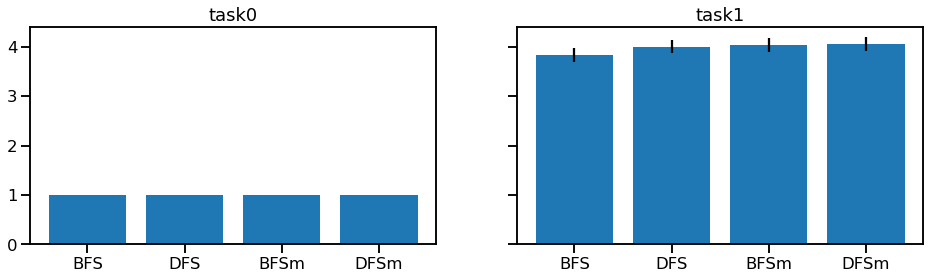

In [4]:
f,axar = plt.subplots(1,2,sharey=True,figsize=(16,4))
for ti in range(2):
  ax = axar[ti]
  ax.set_title('task%i'%ti)
  ax.bar(idxL,rt.mean(0)[:,ti],yerr=rt.std(0)[:,ti]/np.sqrt(nitr))

### 1step learn twostep

In [12]:
t0=Task(form_obs([9,12,13,16, 6]),1,1)
t1=Task(form_obs([9,12,13,16, 6,3]),1,2)
t2=Task(form_obs([9,12,13,16, 3,7]),1,2)
nitr=10000

In [13]:
## transfer
rt1,smode1 = run2taskL([t0,t1],nitr)
rt1.mean(0)

array([[ 4.013 , 16.5955],
       [ 3.9903, 13.0004],
       [ 3.9984,  5.4681],
       [ 3.9795, 12.0941]])

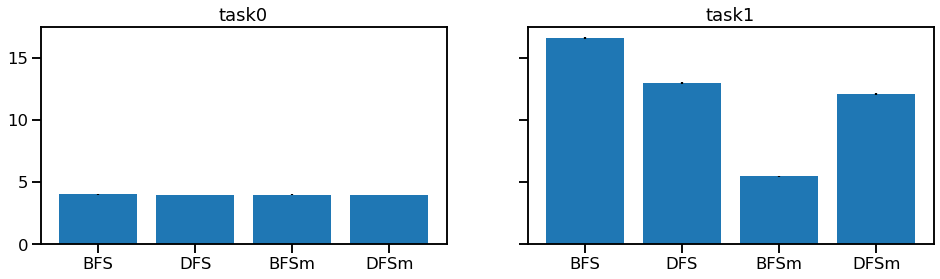

In [14]:
# fig
f,axar = plt.subplots(1,2,sharey=True,figsize=(16,4))
for ti in range(2):
  ax = axar[ti]
  ax.set_title('task%i'%ti)
  ax.bar(idxL,rt1.mean(0)[:,ti],yerr=rt1.std(0)[:,ti]/np.sqrt(nitr))

Text(0, 0.5, 'memory use')

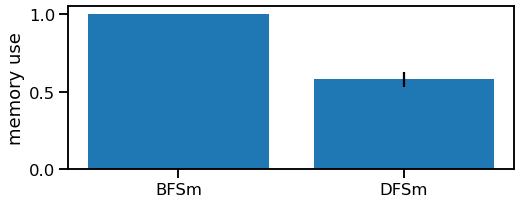

In [8]:
f,ax = plt.subplots(1,1,figsize=(8,3))
ax.bar(idxL[2:],smode1.mean(0)[2:,1],yerr=smode1.std(0)[2:,1]/np.sqrt(100))
ax.set_ylabel('memory use')

### expect no transfer

In [9]:
## no transfer
t0=Task(form_obs([9,12,13,16, 6]),1,1)
t2=Task(form_obs([9,12,13,16, 3,7]),1,2)
rt2,smode2 = run2taskL([t0,t2],nitr=100)
rt2.mean(0)

array([[ 3.81, 16.25],
       [ 4.1 , 12.9 ],
       [ 3.99, 16.81],
       [ 3.94, 12.06]])

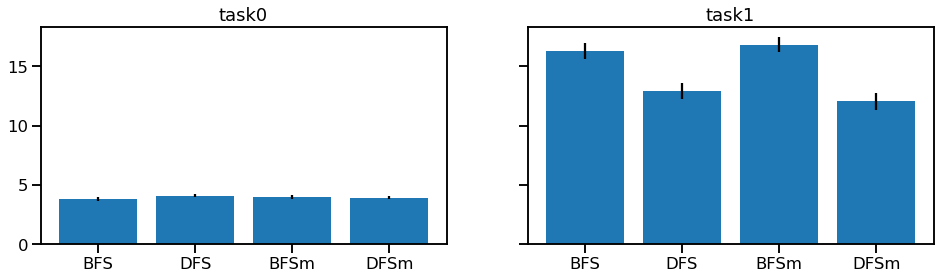

In [10]:
# fig
f,axar = plt.subplots(1,2,sharey=True,figsize=(16,4))
for ti in range(2):
  ax = axar[ti]
  ax.set_title('task%i'%ti)
  ax.bar(idxL,rt2.mean(0)[:,ti],yerr=rt2.std(0)[:,ti]/np.sqrt(nitr))

Text(0, 0.5, 'memory use')

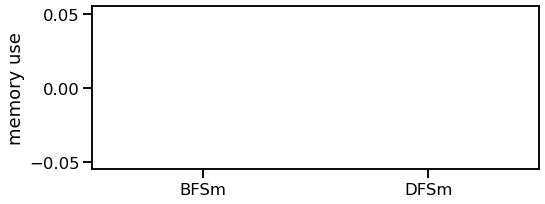

In [11]:
f,ax = plt.subplots(1,1,figsize=(8,3))
ax.bar(idxL[2:],smode2.mean(0)[2:,1],yerr=smode2.std(0)[2:,1]/np.sqrt(nitr))
ax.set_ylabel('memory use')